In [12]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

plt.rcdefaults()
#plt.style.use("seaborn")
plt.rc("figure", figsize=(11.2, 6.3))
sns.set_theme()

Freezing Fritz, is a pretty cool guy. He has one problem, though. In his house, it is quite often too cold or to hot during the night. Then he has to get up and open or close his windows or turn on the heat. Needless to say, he would like to avoid this. 

However, his flat has three doors that he can keep open or closed, it has four radiators, and four windows. It seems like there are endless possibilities of prepping the flat for whatever temperature the night will have. 

Fritz, does not want to play his luck any longer and decided to get active. He recorded the temperature outside and inside of his bedroom for the last year. Now he would like to find an prediction that, given the outside temperature, as well as a certain configuration of his flat, tells him how cold or warm his bedroom will become.

Can you help Freezing Fritz to find blissful sleep?

In [14]:
original_df = pd.read_csv("data_train_Temperature.csv")
original_df

,Window 1,Window 2,Window 3,Window 4,Heat Control 1,Heat Control 2,Heat Control 3,Heat Control 4,Door 1,Door 2,Door 3,Temperature Outside,Temperature Bed
0,0.0,0.0,1.0,1.0,0.0,5.0,1.0,1.0,0.0,1.0,1.0,8.232086,17.077426
1,0.0,0.0,1.0,1.0,1.0,4.0,1.0,3.0,1.0,1.0,1.0,5.935949,16.413221
2,1.0,1.0,1.0,0.0,1.0,5.0,5.0,3.0,0.0,0.0,1.0,10.550271,23.228559
3,0.0,1.0,1.0,0.0,4.0,3.0,3.0,3.0,1.0,0.0,0.0,2.591696,16.224344
4,1.0,0.0,0.0,1.0,2.0,1.0,4.0,0.0,1.0,1.0,1.0,18.516631,21.047208
...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,0.0,1.0,0.0,0.0,3.0,5.0,5.0,5.0,0.0,0.0,0.0,3.049163,26.011447
726,0.0,0.0,0.0,0.0,5.0,1.0,2.0,0.0,1.0,1.0,1.0,14.723168,25.502695
727,0.0,1.0,1.0,1.0,5.0,5.0,3.0,5.0,0.0,1.0,1.0,7.907167,19.478236
728,1.0,1.0,1.0,1.0,4.0,5.0,2.0,2.0,0.0,1.0,0.0,20.811523,22.482037


In [15]:
original_df.describe()

,Window 1,Window 2,Window 3,Window 4,Heat Control 1,Heat Control 2,Heat Control 3,Heat Control 4,Door 1,Door 2,Door 3,Temperature Outside,Temperature Bed
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,0.478082,0.473973,0.473973,0.502740,2.450685,2.561644,2.515068,2.416438,0.475342,0.471233,0.513699,8.211303,19.624089
std,0.499862,0.499664,0.499664,0.500335,1.735107,1.710825,1.734953,1.695391,0.499734,0.499514,0.500155,7.857266,3.915569
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-4.945738,9.246765
25%,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.377688,16.473373
50%,0.000000,0.000000,0.000000,1.000000,2.000000,3.000000,3.000000,2.000000,0.000000,0.000000,1.000000,7.660876,20.289835
75%,1.000000,1.000000,1.000000,1.000000,4.000000,4.000000,4.000000,4.000000,1.000000,1.000000,1.000000,15.096424,22.714459
max,1.000000,1.000000,1.000000,1.000000,5.000000,5.000000,5.000000,5.000000,1.000000,1.000000,1.000000,21.982949,28.306661


We use the correlation matrix again to see how each of the parameters of the problem affect the temperature in the bedroom. We also look at how the trade-off between outside and inside temperature is affected by some of the parameters.

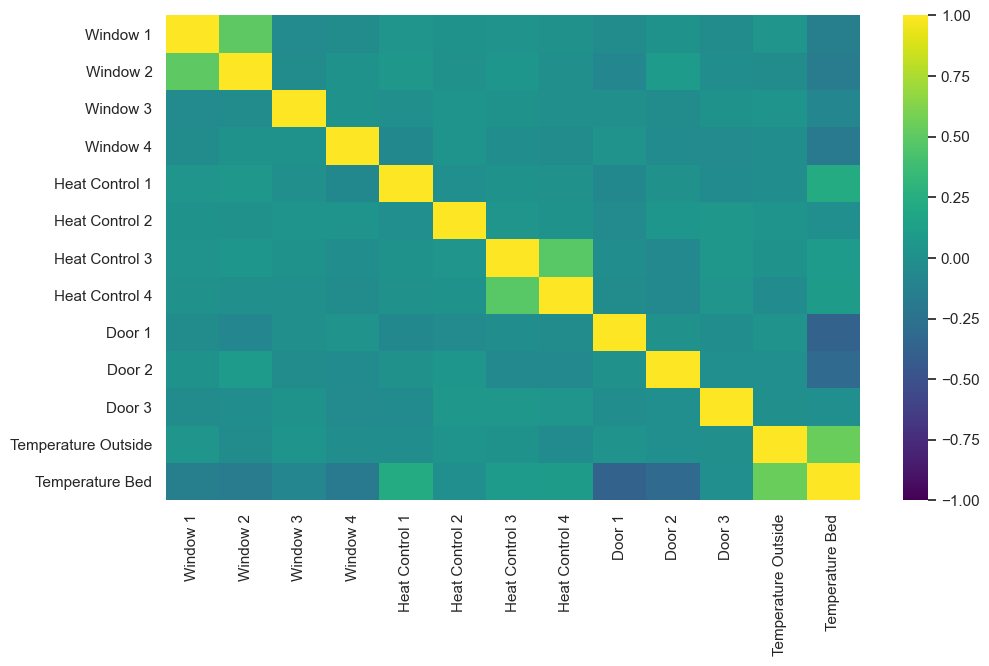

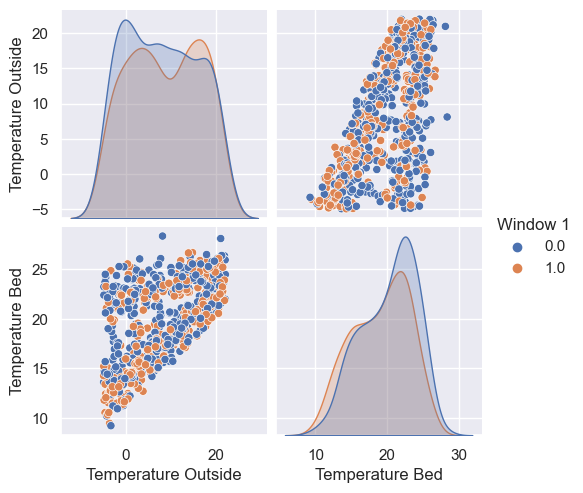

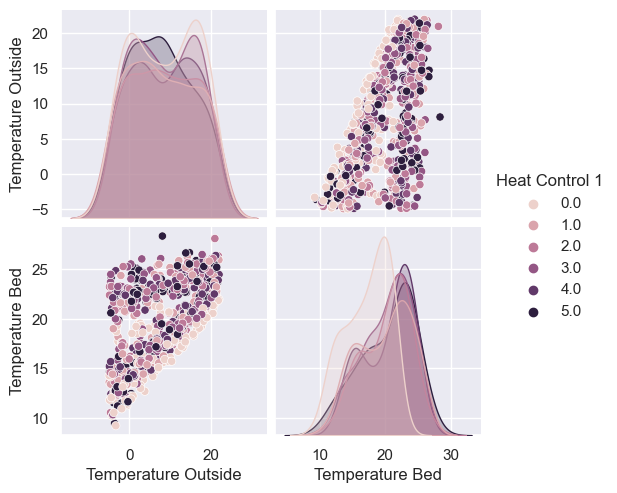

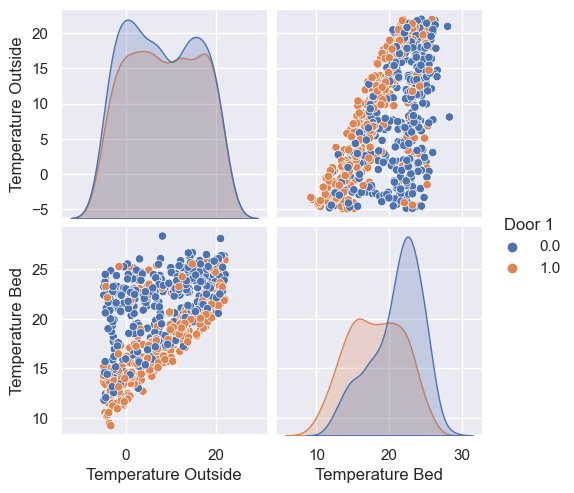

In [16]:
sns.heatmap(original_df.corr(), annot = False, cmap = "viridis", vmin = -1, vmax = 1)
sns.pairplot(original_df, vars = ['Temperature Outside', 'Temperature Bed'], kind = 'scatter', hue = 'Window 1')
sns.pairplot(original_df, vars = ['Temperature Outside', 'Temperature Bed'], kind = 'scatter', hue = 'Heat Control 1')
sns.pairplot(original_df, vars = ['Temperature Outside', 'Temperature Bed'], kind = 'scatter', hue = 'Door 1')
plt.show()

We do not have that many data points. We should therefore first reduce the dimensionality of the problem.

My idea is to interpolate over the data but weigh it according to my observations. So I give low weights to windows 2 and 3. Same with door 3.
Then 

We train on the first 80% of the data and then test on the remaining 20%

In [76]:
X = original_df.values[:, :-1]
Y = original_df.values[:, -1]

n_rows = original_df.shape[0]
train_data = original_df.drop(range(int(0.2 * n_rows)), axis = 0)
test_data = original_df.drop(range(int(0.2 * n_rows), n_rows), axis = 0)

X_train = train_data.values[:, :-1]
Y_train = train_data.values[:, -1]
X_test = test_data.values[:, :-1]
Y_test = test_data.values[:, -1]

In [79]:
class PetersenRegressor:
    
    def __init__(self, weights = None, X = None, Y = None):
        if weights is None:
            self.weights = [10, 1, 1, 10, 1, 1, 1, 1, 10, 10, 1, 1]
        else:
            self.weights = weights
        self.X = X
        self.Y = Y
        
        
    def predict(self, X):
        if self.weights is None or self.X is None or self.Y is None:
            raise Exception("Not fitted yet!")
        
        prediction = np.zeros(len(X))
        
        for k, row in enumerate(X):
            weighted_RMS = np.array([np.linalg.norm(self.weights * (row - x))**4 for x in self.X])
            value = np.sum(self.Y / weighted_RMS)
            total_dist = np.sum(1 / weighted_RMS)
            prediction[k] = value / total_dist
                        
        return prediction
        
        
    def fit(self, X, Y):
        if self.weights is None:
            ... # find optimal weights
        self.X = X
        self.Y = Y
        
        
    def score(self, X, Y):
        # root mean square error
        return np.linalg.norm(self.predict(X) - Y) / np.sqrt(len(Y))
    
    def get_params(self, deep):
        # for compatability with sklearn
        return {}

Now we compute the root mean square error on the test set:

In [80]:
reg = PetersenRegressor()
reg.fit(X_train, Y_train)
reg.score(X_test, Y_test)

2.016474291009952

In [103]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, TheilSenRegressor, RANSACRegressor, Ridge
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor

rng = np.random.RandomState(42)

regressors = {
    "Petersen" :          PetersenRegressor(),
    "Nearest Neighbors" : KNeighborsRegressor(),
    "linear SVM" :        SVR(kernel = "linear"),
    "polynomial SVM":     SVR(kernel = "poly"),
    "radial SVM":         SVR(kernel = "rbf"),
    "sigmoid SVM":        SVR(kernel = "sigmoid"),
    "linear" :            LinearRegression(),
    "Theil-Sen" :         TheilSenRegressor(random_state = rng),
    "RANSAC" :            RANSACRegressor(random_state = rng),
    "Ridge" :             Ridge(random_state = rng),
    "Gaussian Process" :  GaussianProcessRegressor(random_state = rng),
    "Decision Tree" :     DecisionTreeRegressor(random_state = rng),
    "Random Forest" :     RandomForestRegressor(random_state = rng),
    "Ada Boost" :         AdaBoostRegressor(random_state = rng),
    "Gradient Boost" :    GradientBoostingRegressor(random_state = rng),
    "Neural Network" :    MLPRegressor(max_iter = 2000, alpha = 1, random_state = rng)
}

In [104]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, max_error, r2_score

comparison = pd.DataFrame()

for name, reg in regressors.items():
    print(f"{name:17} : ", end="")
    reg.fit(X_train, Y_train)
    print("fitted, ", end="")
    prediction = reg.predict(X_test)
    print("predicted, ", end="")
    comparison.loc[name, "root mean squared"] = mean_squared_error(Y_test, prediction, squared = False)
    comparison.loc[name, "mean absolute"] = mean_absolute_error(Y_test, prediction)
    comparison.loc[name, "max"] = max_error(Y_test, prediction)
    comparison.loc[name, "R^2"] = r2_score(Y_test, prediction)
    print("scored.")

Petersen         : fitted, predicted, scored.
Nearest Neighbors: fitted, predicted, scored.
linear SVM       : fitted, predicted, scored.
polynomial SVM   : fitted, predicted, scored.
radial SVM       : fitted, predicted, scored.
sigmoid SVM      : fitted, predicted, scored.
linear           : fitted, predicted, scored.
Theil-Sen        : fitted, predicted, scored.
RANSAC           : fitted, predicted, scored.
Ridge            : fitted, predicted, scored.
Gaussian Process : fitted, predicted, scored.
Decision Tree    : fitted, predicted, scored.
Random Forest    : fitted, predicted, scored.
Ada Boost        : fitted, predicted, scored.
Gradient Boost   : fitted, predicted, scored.
Neural Network   : fitted, predicted, scored.


In [105]:
comparison.style.highlight_min(["root mean squared", "mean absolute", "max"], "green").highlight_max("R^2", "green")

,root mean squared,mean absolute,max,R^2
Petersen,2.016474,1.544714,7.636543,0.727559
Nearest Neighbors,3.328092,2.626690,9.220045,0.257874
linear SVM,2.354257,1.761049,8.394047,0.628641
polynomial SVM,3.268607,2.541032,9.467643,0.284166
radial SVM,3.010612,2.239970,8.525100,0.392709
sigmoid SVM,23.787840,20.743096,43.365626,-36.913767
linear,2.289599,1.766995,7.385664,0.648759
Theil-Sen,2.290185,1.767284,7.355446,0.648579
RANSAC,2.778507,2.199184,10.610176,0.482739
Ridge,2.288048,1.764392,7.373986,0.649234


## Save Prediction

In [ ]:
'''data_test_Temperature = pd.read_csv('data_test_Temperature.csv')
prediction = predict(data_test_Temperature)
predicted_Temperatures = prediction.values[:,-1]
    
np.savetxt('PhilippPetersens_Temperature_prediction.csv', predicted_Temperatures, delimiter=',') '''